In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import random
import copy
import json
import pandas as pd
import seaborn as sns

from helpers.helper import get_cath
from Bio import SeqIO
from os import listdir
from os.path import isfile, join


In [2]:
cath = get_cath()

In [22]:
# sort proteins by number of domains and seperate
# maximum number of domains is 6

# domain_chains_dict = {
    
# }


# lengths = {}
# for code, info in cath.items():
#     chains = info.keys()
#     for chain in chains:
#         domains = cath[code][chain]
#         no_of_domains = len(domains)
#         lengths[str(no_of_domains)] = lengths.get(str(no_of_domains), 0) + 1

# for n in lengths.keys():
#     domain_chains_dict[n] = []

# for code, info in cath.items():
#     chains = info.keys()
#     for chain in chains:
#         domains = cath[code][chain]
#         no_of_domains = len(domains)
#         domain_chains_dict[str(no_of_domains)].append(f'{code}:{chain}')


# random_sample = {}
# for size, chains in domain_chains_dict.items():
#     x = len(chains)
#     random_sample[size] = random.sample(chains, min(2500, x))


In [4]:
with open('../data/cath/random_balanced/result.json') as f:
    random_sample = json.load(f)

In [5]:
# number of chains for each size from 6 chains and upwards, accumulated
for i in range(1,21):
    s = str(i)
    if s in random_sample.keys():
        l = len(random_sample[s])
        print(s, l)

1 2500
2 2500
3 2500
4 2500
5 2338
6 863
7 160
8 419
9 75
10 44
11 4
12 21
13 29
14 1
16 8
19 1
20 2


In [7]:
# number of chains for each size from 6 chains and upwards, accumulated
acc = []
for i in range(6,21):
    s = str(i)
    if s in random_sample.keys():
        l = len(random_sample[s])
        acc.append(l)

print(sum(acc))

1627


In [8]:
# total number of chains
all = [len(x) for x in random_sample.values()]
print(sum(all))

13965


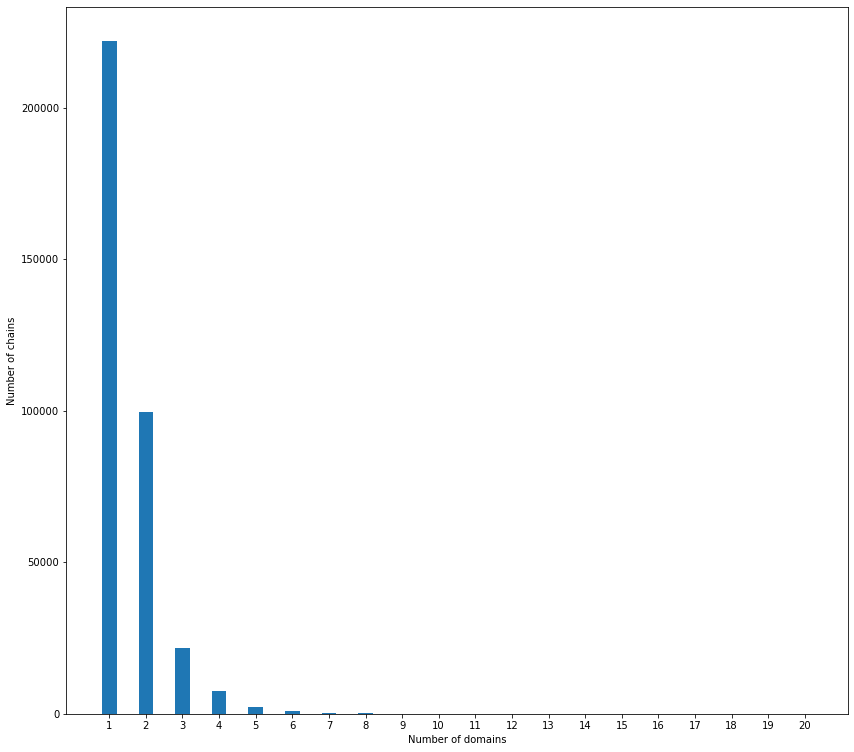

In [44]:
# visualisations

# data from CATH (v. 4.3)
# http://download.cathdb.info/cath/releases/all-releases/v4_3_0/cath-classification-data/

# data = {i : len(domain_chains_dict[str(i)]) for i in domain_chains_dict.keys}

domains = [str(i) for i in range(1,21)]
size = [len(domain_chains_dict.get(str(i),[] )) for i in range(1,21)]

fig = plt.figure(figsize = (14, 13))

# creating the bar plot
plt.bar(domains, size, width = 0.4)

plt.xlabel("Number of domains")
plt.ylabel("Number of chains")
plt.title("")
plt.show()

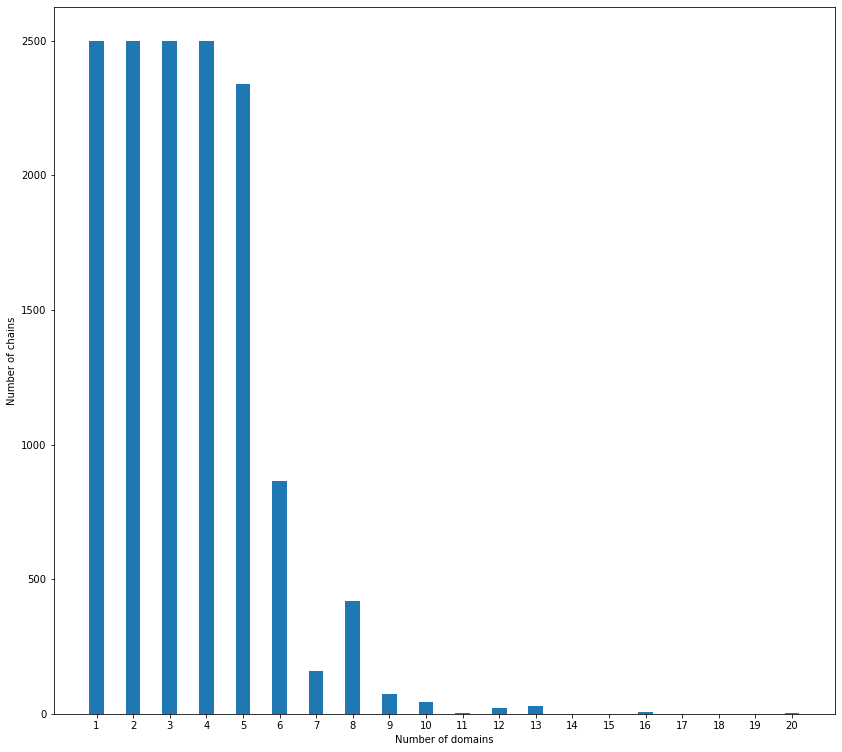

Chains with 1 domains: 2500
Chains with 2 domains: 2500
Chains with 3 domains: 2500
Chains with 4 domains: 2500
Chains with 8 domains: 419
Chains with 7 domains: 160
Chains with 6 domains: 863
Chains with 5 domains: 2338
Chains with 10 domains: 44
Chains with 9 domains: 75
Chains with 12 domains: 21
Chains with 13 domains: 29
Chains with 11 domains: 4
Chains with 20 domains: 2
Chains with 19 domains: 1
Chains with 16 domains: 8
Chains with 14 domains: 1


In [243]:
domains = [str(i) for i in range(1,21)]
size = [len(random_sample.get(str(i),[] )) for i in range(1,21)]

fig = plt.figure(figsize = (14, 13))

# creating the bar plot
plt.bar(domains, size, width = 0.4)

plt.xlabel("Number of domains")
plt.ylabel("Number of chains")
plt.title("")
plt.show()

for k in [int(x) for x in random_sample.keys()]:
    print(f"Chains with {k} domains: {len(random_sample[str(k)])}")

In [194]:
# create comma seperated codes for bulk download
codes = []
for k, v in random_sample.items():
    for chain in v:
        codes.append(chain[:4] + ',')

In [56]:
with open('../data/pdb/bulk/balanced/balanced.txt', 'w') as f:
    f.writelines(codes)

In [9]:
random_sample_keys = []
for k, v in random_sample.items():
    for code in v:
        random_sample_keys.append(code.upper())

In [10]:
len(random_sample_keys)

13965

In [199]:
# print(sorted(random_sample_keys))

In [11]:
mypath = '../data/pdb/bulk/balanced/backup/data/'

files = [f for f in listdir(mypath) if isfile(join(mypath, f))]
# codes = [x[:4] for x in files]
missing = []

# find the missing chains

chains_of_interest = []
for key in random_sample_keys:
    file = key[:4].lower() + '.pdb'
    PDB_file_path = f'{mypath}{file}'
    try:
        chains = {record.id: record.seq for record in SeqIO.parse(PDB_file_path, 'pdb-seqres')}
    except FileNotFoundError:
        print("File does not exist", key)
        print()
        missing.append(key)

    # chains.keys() take weird formats some times so try different formats
    key2 = key[:-1] + key[-1].lower()
    key3 = key[-1]
    if (key not in chains.keys()) and (key2 not in chains.keys()) and (key3 not in chains.keys()):
        # missing.append(key)
        print(key)
        print(chains.keys())
        print(file)
        print()
        missing.append(key)


File does not exist 1BOS:J

1BOS:J
dict_keys(['1Q7Y:1', '1Q7Y:2', '1Q7Y:3', '1Q7Y:4', '1Q7Y:5', '1Q7Y:A', '1Q7Y:B', '1Q7Y:C', '1Q7Y:D', '1Q7Y:E', '1Q7Y:F', '1Q7Y:G', '1Q7Y:H', '1Q7Y:I', '1Q7Y:J', '1Q7Y:K', '1Q7Y:L', '1Q7Y:M', '1Q7Y:N', '1Q7Y:O', '1Q7Y:P', '1Q7Y:Q', '1Q7Y:R', '1Q7Y:S', '1Q7Y:T', '1Q7Y:U', '1Q7Y:V', '1Q7Y:W', '1Q7Y:X', '1Q7Y:Y', '1Q7Y:Z'])
1bos.pdb

1TDM:0
dict_keys([' '])
1tdm.pdb

File does not exist 5EXC:G

5EXC:G
dict_keys(['5ZGC:A', '5ZGC:B', '5ZGC:C', '5ZGC:D', '5ZGC:E', '5ZGC:F', '5ZGC:G', '5ZGC:H', '5ZGC:I', '5ZGC:J', '5ZGC:K', '5ZGC:L'])
5exc.pdb

5P8N:A
dict_keys(['5OYQ:A'])
5p8n.pdb

5OZK:A
dict_keys(['5OYQ:A'])
5ozk.pdb

5P1Y:A
dict_keys(['5OYQ:A'])
5p1y.pdb

5P6J:A
dict_keys(['5OYQ:A'])
5p6j.pdb

5P3I:A
dict_keys(['5OYQ:A'])
5p3i.pdb

5P1U:A
dict_keys(['5OYQ:A'])
5p1u.pdb

5OYS:A
dict_keys(['5OYQ:A'])
5oys.pdb

5P7E:A
dict_keys(['5OYQ:A'])
5p7e.pdb

5P6L:A
dict_keys(['5OYQ:A'])
5p6l.pdb

5P5D:A
dict_keys(['5OYQ:A'])
5p5d.pdb

5P30:A
dict_keys(['5OYQ:A'])
5p3

In [12]:
missing

['1BOS:J',
 '1BOS:J',
 '1TDM:0',
 '5EXC:G',
 '5EXC:G',
 '5P8N:A',
 '5OZK:A',
 '5P1Y:A',
 '5P6J:A',
 '5P3I:A',
 '5P1U:A',
 '5OYS:A',
 '5P7E:A',
 '5P6L:A',
 '5P5D:A',
 '5P30:A',
 '5P03:A',
 '5P6Y:A',
 '1ALO:0',
 '1BUK:0']

In [13]:
# function to figure how many domains a chain has (from the sample dict):
def domains_from_chain(chain):
    chain = chain.lower()
    for k, v in random_sample.items():
        v = [x.lower() for x in v]
        if chain in v:
            # print(f"{chain} has {k} domains")
            return k
    print(f"didn't find {chain}")
    

In [14]:
missing

['1BOS:J',
 '1BOS:J',
 '1TDM:0',
 '5EXC:G',
 '5EXC:G',
 '5P8N:A',
 '5OZK:A',
 '5P1Y:A',
 '5P6J:A',
 '5P3I:A',
 '5P1U:A',
 '5OYS:A',
 '5P7E:A',
 '5P6L:A',
 '5P5D:A',
 '5P30:A',
 '5P03:A',
 '5P6Y:A',
 '1ALO:0',
 '1BUK:0']

In [15]:
for c in missing:
    print(c, "has", domains_from_chain(c))

1BOS:J has 1
1BOS:J has 1
1TDM:0 has 1
5EXC:G has 1
5EXC:G has 1
5P8N:A has 2
5OZK:A has 2
5P1Y:A has 2
5P6J:A has 2
5P3I:A has 2
5P1U:A has 2
5OYS:A has 2
5P7E:A has 2
5P6L:A has 2
5P5D:A has 2
5P30:A has 2
5P03:A has 2
5P6Y:A has 2
1ALO:0 has 7
1BUK:0 has 6


### Finally

After performing stratified sampling and downloading the data, only 20 chains were missings. The results are shown below

In [16]:
true_random_sample = copy.deepcopy(random_sample)
for chain in missing:
    chain = chain[:-1].lower() + chain[-1]
    # print(chain)
    n = domains_from_chain(chain)
    try:
        true_random_sample[str(n)].remove(chain)
    except ValueError:
        print(chain, "not in") # probably removed already

1bos:J not in
5exc:G not in


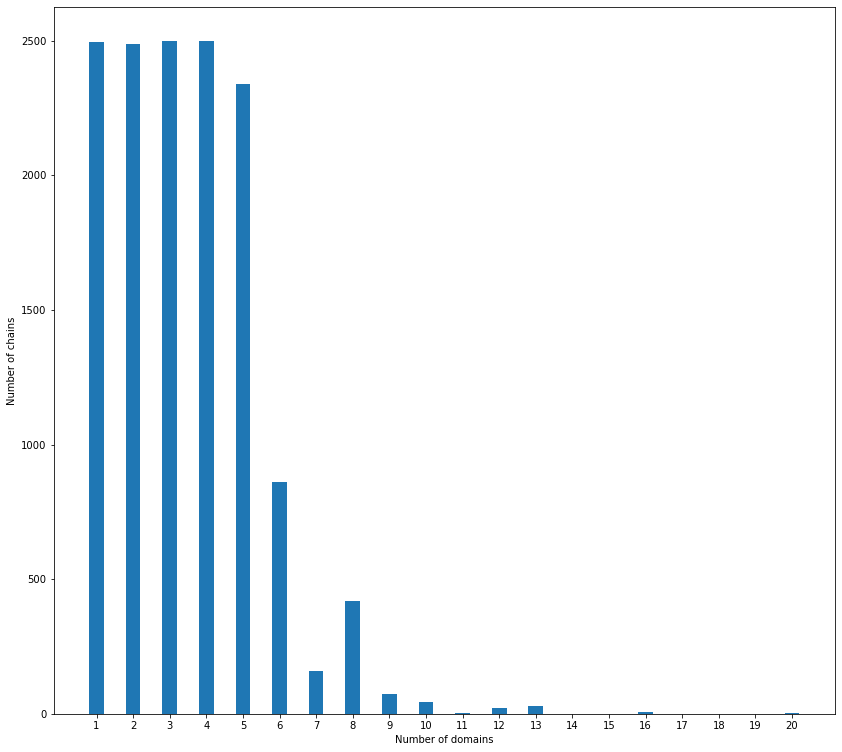

Chains with 1 domains: 2497
Chains with 2 domains: 2487
Chains with 3 domains: 2500
Chains with 4 domains: 2500
Chains with 5 domains: 2338
Chains with 6 domains: 862
Chains with 7 domains: 159
Chains with 8 domains: 419
Chains with 9 domains: 75
Chains with 10 domains: 44
Chains with 11 domains: 4
Chains with 12 domains: 21
Chains with 13 domains: 29
Chains with 14 domains: 1
Chains with 16 domains: 8
Chains with 19 domains: 1
Chains with 20 domains: 2


In [17]:
domains = [str(i) for i in range(1,21)]
size = [len(true_random_sample.get(str(i),[] )) for i in range(1,21)]

fig = plt.figure(figsize = (14, 13))

# creating the bar plot
plt.bar(domains, size, width = 0.4)

plt.xlabel("Number of domains")
plt.ylabel("Number of chains")
plt.title("")
plt.show()

for k in range(1, 21):
    try:
        print(f"Chains with {k} domains: {len(true_random_sample[str(k)])}")
    except KeyError:
        continue

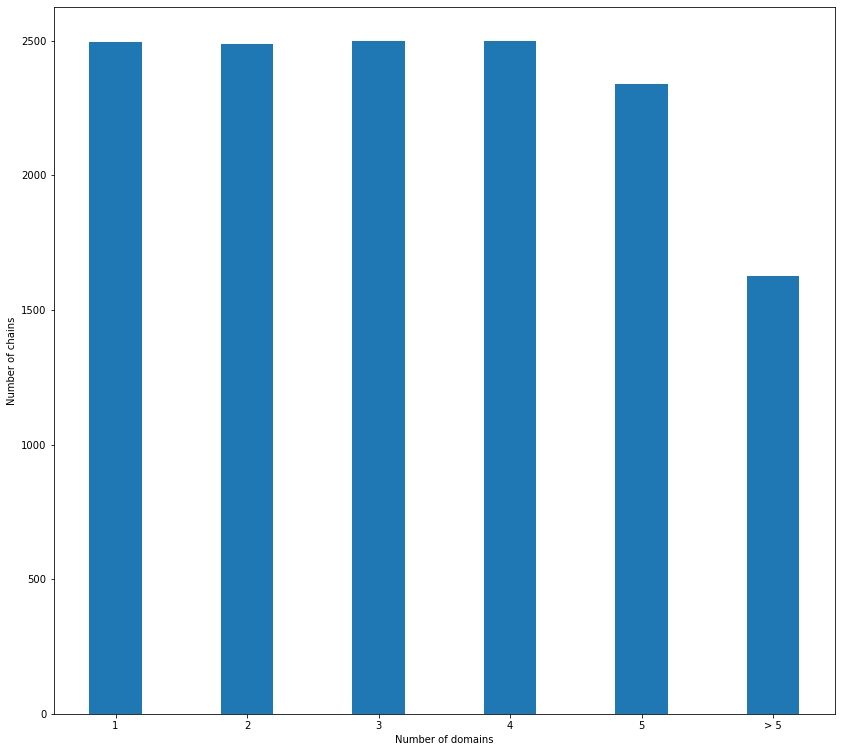

Chains with 1 domains: 2497
Chains with 2 domains: 2487
Chains with 3 domains: 2500
Chains with 4 domains: 2500
Chains with 5 domains: 2338
Chains with > 5 domains: 1625


In [18]:
n = 6
domains = [str(i) for i in range(1,n)]
size = [len(true_random_sample.get(str(i),[] )) for i in range(1,n)]

more_than_n = sum([len(true_random_sample.get(str(i),[] )) for i in range(n,21)])

domains.append('> 5')
size.append(more_than_n)

fig = plt.figure(figsize = (14, 13))

# creating the bar plot
plt.bar(domains, size, width = 0.4)

plt.xlabel("Number of domains")
plt.ylabel("Number of chains")
plt.title("")
plt.show()

for k in range(1, n):
    try:
        print(f"Chains with {k} domains: {len(true_random_sample[str(k)])}")
    except KeyError:
        continue

print(f"Chains with > {n-1} domains: {more_than_n}")


In [19]:
densities = {
    '1' : [],
    '2' : [],
    '3' : [],
    '4' : [],
    '5' : [],
    '> 5' : []
    }
n = 6
for dom, lst in true_random_sample.items():
    tmp = []
    for chain in lst:

        pdb_code = chain[:4]
        
        pdb_file_path = f'../data/pdb/bulk/balanced/backup/data/{pdb_code}.pdb'

        chains = {record.id: record.seq for record in SeqIO.parse(pdb_file_path, 'pdb-seqres')}

        key = chain.upper()
        key2 = key[:-1] + key[-1].lower()
        key3 = key[-1]

        keys = [key, key2, key3]

        found = False
        for k in keys:
            if k in chains.keys():
                seq = chains[k]
                break

        if int(dom) > n - 1:
            densities['> 5'].append(len(seq))
        else:
         densities[dom].append(len(seq))
        

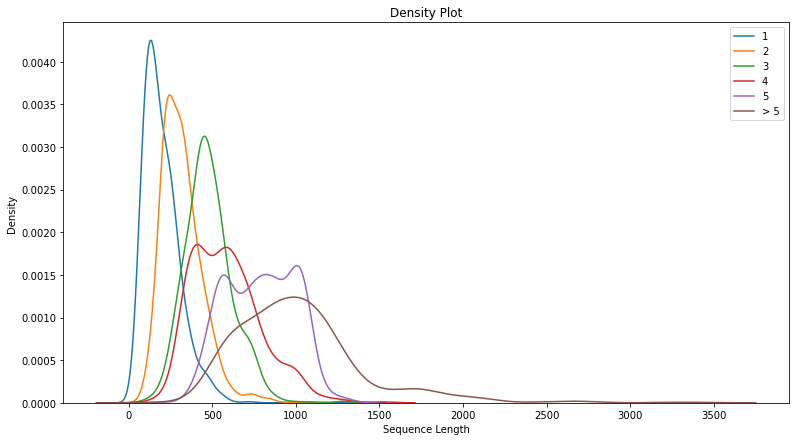

In [20]:
fig = plt.figure(figsize = (13, 7))
labels = []

for k, v in densities.items():
    sns.kdeplot(data=v, bw_adjust=1.5)
    labels.append(k)

plt.legend(labels=labels)
plt.xlabel("Sequence Length")    
plt.title("Density Plot")
plt.show()

### Create the DataFrame from the balanced data

#### One-Hot

In [21]:
true_random_sample_keys = []
for v in true_random_sample.values():
    for chain in v:
        true_random_sample_keys.append(chain)

In [269]:
# DOUBLE CHECK THAT NOTHING IS MISSING

# mypath = '../data/pdb/bulk/balanced/backup/data/'

# files = [f for f in listdir(mypath) if isfile(join(mypath, f))]
# # codes = [x[:4] for x in files]
# missing = []

# chains_of_interest = []
# for key in true_random_sample_keys:
#     key = key.upper()
#     file = key[:4].lower() + '.pdb'
#     PDB_file_path = f'{mypath}{file}'
#     chains = {record.id: record.seq for record in SeqIO.parse(PDB_file_path, 'pdb-seqres')}


#     # chains.keys() take weird formats some times so try different formats
#     key2 = key[:-1] + key[-1].lower()
#     key3 = key[-1]
#     if (key not in chains.keys()) and (key2 not in chains.keys()) and (key3 not in chains.keys()):
#         print(key)
#         print(chains.keys())
#         print()

In [22]:
def one_hot_seq(seq):
    amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
    encoded = np.array([1 if elt == 'A' else 0 for elt in seq],dtype=np.float64)
    # start from the second element since the first one is A and was created above
    for amino_acid in amino_acids[1:]:
        new = np.array([1 if elt == amino_acid else 0 for elt in seq])
        encoded = np.vstack((encoded, new))
    return encoded


def boundariesN(seq, domain, n):
    # return the boundaries from a sequence and a domain
    # seq is only used for getting the length
    bounds = np.zeros((len(seq)), dtype=np.int8)

    for k, v in domain.items():
        boundary_positions = v.split(',')
        for b in boundary_positions:
            indices = [int(i) for i in b.split('-')]
            for i in indices:
                low = max(i - n, 1)
                high = min(i + n, len(seq))
                for j in range(low, high + 1):
                    bounds[j - 1] = 1
    return np.array(bounds, dtype=np.float64)

In [377]:
# s='ACDEFGHIKLMNPQRSTVWYACDEFGHIKLMNPQRSTVWY'
# d = {
#     '1' : '1-19,31-41',
#     '2' : '20-31'
# }
# # boundariesN(s,d,2)

# # analyse why some targets look like this : [1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1]
# ANSWER: low = max(i - n, 0) caused j to become -1 affecting the last element. Changed to: low = max(i - n, 1)

# for chain in true_random_sample_keys:

#     pdb_code = chain[:4]
    
#     pdb_file_path = f'../data/pdb/bulk/balanced/backup/data/{pdb_code}.pdb'

#     chains = {record.id: record.seq for record in SeqIO.parse(pdb_file_path, 'pdb-seqres')}

#     key = chain.upper()
#     key2 = key[:-1] + key[-1].lower()
#     key3 = key[-1]

#     keys = [key, key2, key3]

#     found = False
#     for k in keys:
#         if k in chains.keys():
#             seq = chains[k]
#             break

#     domain = cath[pdb_code][chain[-1]]
#     target = boundariesN(seq, domain, 8)
#     print(domain)
#     print(len(seq))
#     print(target)
#     break

In [23]:
df = pd.DataFrame(columns=['in', 'out'])
df['in'] = df['in'].astype(object)
df['out'] = df['out'].astype(object)

counter = 0

for chain in true_random_sample_keys:

    pdb_code = chain[:4]
    
    pdb_file_path = f'../data/pdb/bulk/balanced/backup/data/{pdb_code}.pdb'

    chains = {record.id: record.seq for record in SeqIO.parse(pdb_file_path, 'pdb-seqres')}

    key = chain.upper()
    key2 = key[:-1] + key[-1].lower()
    key3 = key[-1]

    keys = [key, key2, key3]

    found = False
    for k in keys:
        if k in chains.keys():
            seq = chains[k]
            break

    input = one_hot_seq(seq)
    domain = cath[pdb_code][chain[-1]]
    target = boundariesN(seq, domain, 20)

    new_df = pd.DataFrame({'in':[input], 'out':[target]})
    df = pd.concat([df,new_df], ignore_index=True)
    counter += 1
    if counter % 1000 == 0:
        print(f'Written {counter}/{len(true_random_sample_keys)} entries')

print(f'Written {counter}/{len(true_random_sample_keys)} entries')

Written 1000/13947 entries
Written 2000/13947 entries
Written 3000/13947 entries
Written 4000/13947 entries
Written 5000/13947 entries
Written 6000/13947 entries
Written 7000/13947 entries
Written 8000/13947 entries
Written 9000/13947 entries
Written 10000/13947 entries
Written 11000/13947 entries
Written 12000/13947 entries
Written 13000/13947 entries
Written 13947/13947 entries


In [24]:
df.to_pickle('../data/cnn/one_hot/data.csv')

In [382]:
test = pd.read_pickle('../data/cnn/one_hot/data.csv')
len(test)

13947